In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Galtons Height Data.csv')

In [3]:
df.isnull().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

In [4]:
df=df.drop('Kids',axis=1)
df=df.drop('Family',axis=1)

In [5]:
def gender_fix (let):
    if let=='M':
        return 1
    else:
         return 0

In [6]:
df['Gender']=df['Gender'].apply(gender_fix)

In [7]:
df.head()

,Father,Mother,Gender,Height
0,78.5,67.0,1,73.2
1,78.5,67.0,0,69.2
2,78.5,67.0,0,69.0
3,78.5,67.0,0,69.0
4,75.5,66.5,1,73.5


In [8]:
df.describe()

,Father,Mother,Gender,Height
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,0.517817,66.760690
std,2.470256,2.307025,0.499961,3.582918
min,62.000000,58.000000,0.000000,56.000000
25%,68.000000,63.000000,0.000000,64.000000
50%,69.000000,64.000000,1.000000,66.500000
75%,71.000000,65.500000,1.000000,69.700000
max,78.500000,70.500000,1.000000,79.000000


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
X=df.drop('Height',axis=1).values
y=df['Height'].values

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler=MinMaxScaler()

In [14]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
model= Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))


In [17]:
model.compile(optimizer='adam',loss='mse')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
earlystop=EarlyStopping(patience=10,monitor="val_loss",mode='min')

In [20]:
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/200
20/20 [==============================] - 1s 16ms/step - loss: 4483.6455 - val_loss: 4463.7090
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 4473.3540 - val_loss: 4453.6890
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 4463.3730 - val_loss: 4445.0039
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 4454.9180 - val_loss: 4435.1030
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 4443.5981 - val_loss: 4422.1753
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 4429.5659 - val_loss: 4406.3701
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 4412.6885 - val_loss: 4388.1997
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 4393.5269 - val_loss: 4367.7993
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 4372.1616 - val_loss: 4342.9219
Epoch 10/200
20/20 [==============================] - 

In [21]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

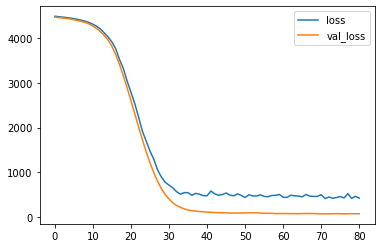

In [22]:
losses.plot()